<a href="https://colab.research.google.com/github/alissonotavioudi/Projetos---ML/blob/main/Copy_of_Imersao_Digital_College_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação ML e DL na Base de Dados Breast Cancer

## **Breast Cancer / Câncer de Mama**  
A base de dados consiste em características calculadas a partir de imagens digitalizadas de biópsias de câncer de mama. As características foram calculadas a partir de imagens digitalizadas de agulha fina de uma massa mamária. Elas descrevem características dos núcleos celulares presentes nas imagens.

O objetivo é classificar as instâncias em dois grupos:

**Maligno (1)**: Indicando que o câncer é maligno.  
**Benigno (0)**: Indicando que o câncer é benigno.

# Machine Learning

## Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection

## Acessando os dados
Base de dados da biblioteca scikit-learning
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
# Conjunto de dados Breast Cancer
breast_cancer = load_breast_cancer()

# Dados para um DataFrame pandas
breast_cancer_db = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_db['target'] = breast_cancer.target

# Exiba as primeiras linhas do DataFrame
display(breast_cancer_db.head())
print(f"Dimensão: {breast_cancer_db.shape}")

# breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dimensão: (569, 31)


In [ ]:
# Gerando amostra do dataframe para validação
breast_cancer_valida = breast_cancer_db.sample(frac = 0.05, random_state = 0)
breast_cancer_valida.shape

(28, 31)

In [ ]:
# breast_cancer_db
breast_cancer_df = breast_cancer_db.merge(
    breast_cancer_valida[['target']],
    how='left',
    left_index=True,
    right_index=True,
    indicator=True
).query('_merge == "left_only"').drop('_merge', 1)

breast_cancer_df.drop('target_y', axis=1, inplace=True)

breast_cancer_df.rename(columns={'target_x':'target'}, inplace=True)

<ipython-input-4-df81af849f73>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ).query('_merge == "left_only"').drop('_merge', 1)


In [ ]:
print("Dimensão da base total: ", breast_cancer_db.shape)
print("Dimensão da base analítica: ",breast_cancer_df.shape)
print("Dimensão da base validação: ",breast_cancer_valida.shape)


Dimensão da base total:  (569, 31)
Dimensão da base analítica:  (541, 31)
Dimensão da base validação:  (28, 31)


## Análise descritiva dos dados

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              541 non-null    float64
 1   mean texture             541 non-null    float64
 2   mean perimeter           541 non-null    float64
 3   mean area                541 non-null    float64
 4   mean smoothness          541 non-null    float64
 5   mean compactness         541 non-null    float64
 6   mean concavity           541 non-null    float64
 7   mean concave points      541 non-null    float64
 8   mean symmetry            541 non-null    float64
 9   mean fractal dimension   541 non-null    float64
 10  radius error             541 non-null    float64
 11  texture error            541 non-null    float64
 12  perimeter error          541 non-null    float64
 13  area error               541 non-null    float64
 14  smoothness error         5

In [ ]:
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,541.0,14.141259,3.527511,6.981000,11.690000,13.340000,15.850000,28.11000
mean texture,541.0,19.307486,4.299556,9.710000,16.210000,18.840000,21.780000,39.28000
mean perimeter,541.0,92.058096,24.338660,43.790000,75.170000,86.180000,104.300000,188.50000
mean area,541.0,656.310351,353.302426,143.500000,420.300000,551.100000,788.500000,2501.00000
mean smoothness,541.0,0.096458,0.014033,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,541.0,0.104186,0.052772,0.019380,0.065450,0.092630,0.129800,0.34540
mean concavity,541.0,0.088531,0.079753,0.000000,0.029660,0.061550,0.126700,0.42680
mean concave points,541.0,0.048919,0.038856,0.000000,0.020310,0.033700,0.073640,0.20120
mean symmetry,541.0,0.181201,0.027299,0.106000,0.162000,0.179200,0.195400,0.30400
mean fractal dimension,541.0,0.062714,0.006980,0.049960,0.057700,0.061490,0.066000,0.09744


## Visualização dos dados

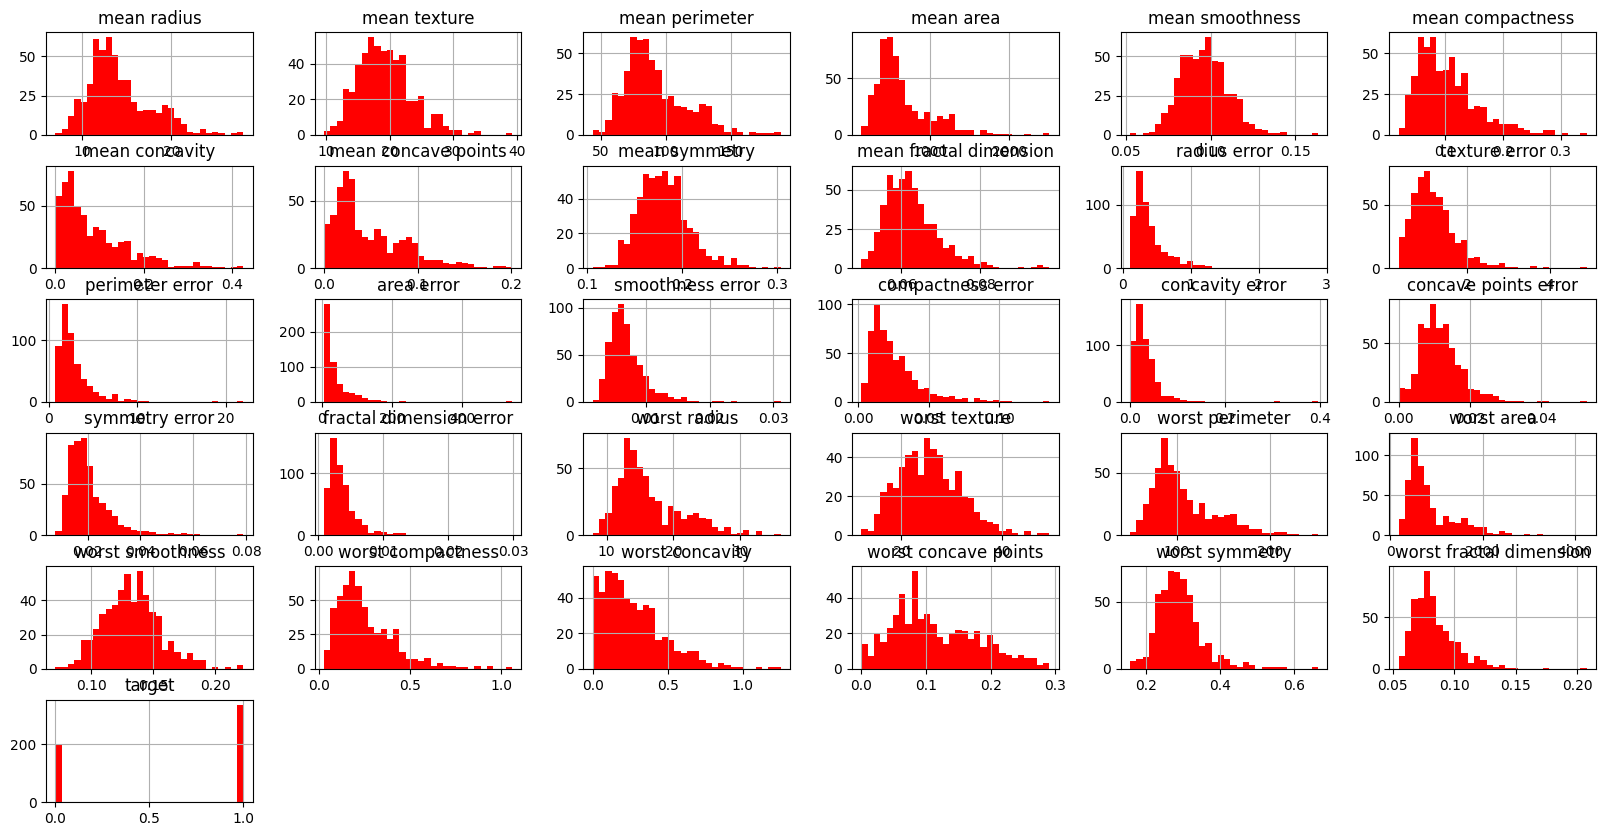

In [ ]:
breast_cancer_df.hist(bins = 30, figsize=(20,10), color = 'r');

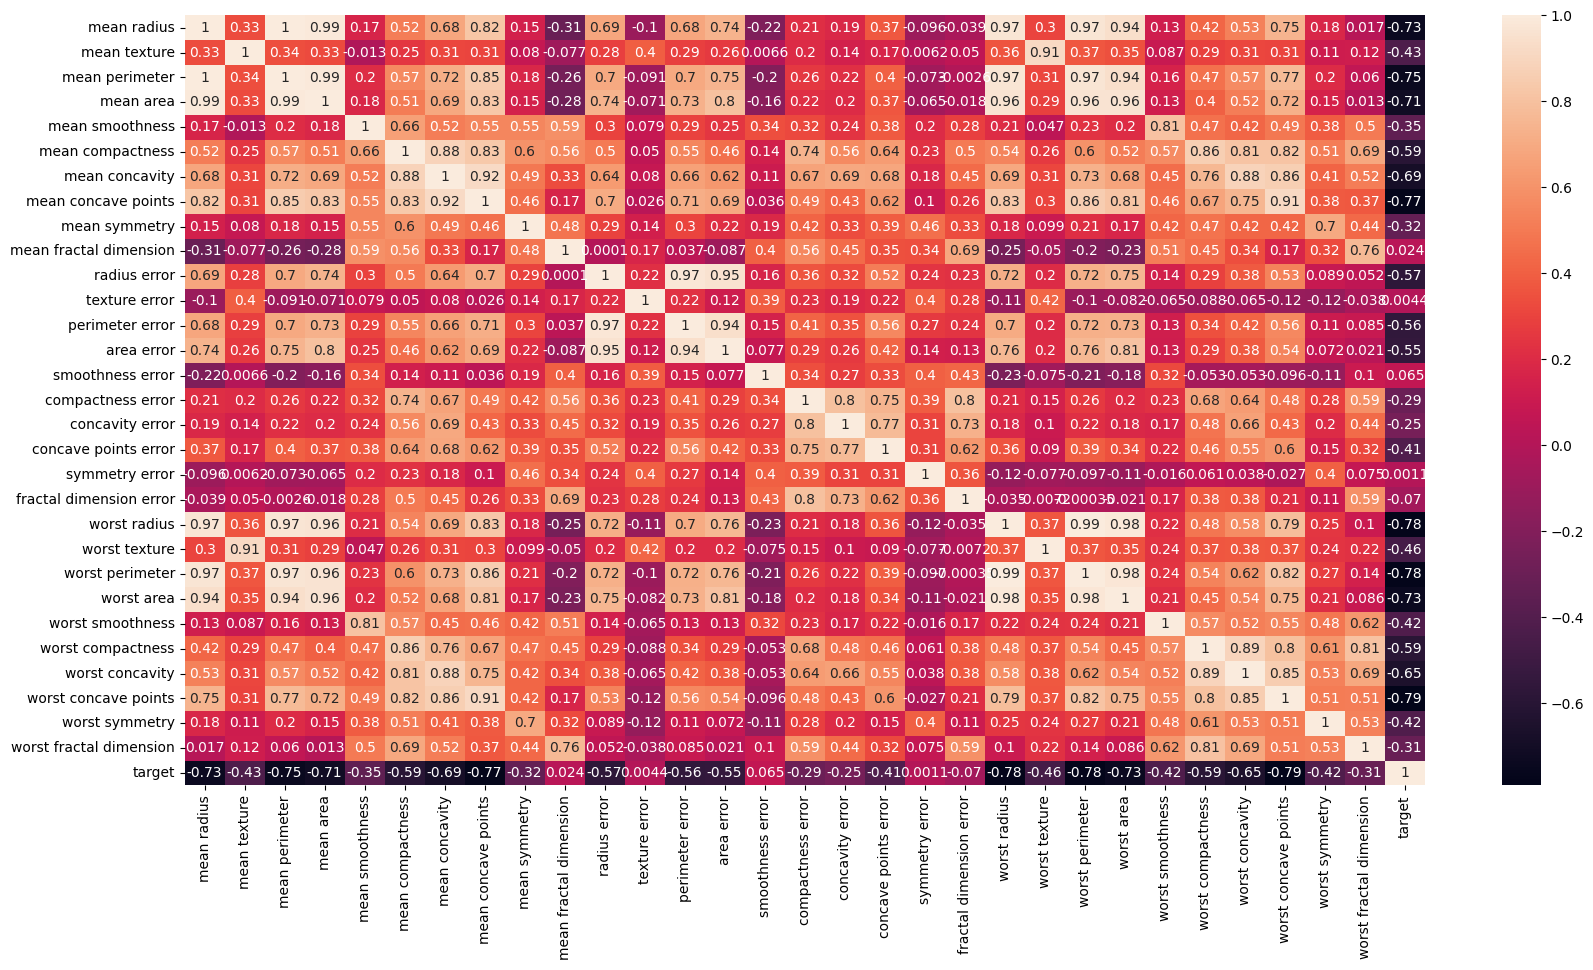

In [ ]:
correlations = breast_cancer_df.corr()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot=True);

## Visualização dos dados com SWEETVIZ

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 17.5 MB/s eta 0:00:00


In [ ]:
# !pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(breast_cancer_df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pré-processamento e Hold Out

In [ ]:
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# Hold Out
from sklearn.model_selection import train_test_split

columns = breast_cancer_df.columns
target = ['target']

feature = list(set(columns) - set(target))

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    breast_cancer_df[feature],
    breast_cancer_df[target],
    test_size = 0.2,
    random_state = 1
)

print(100*y_train.mean())
print(100*y_test.mean())

target    60.87963
dtype: float64
target    68.807339
dtype: float64


In [ ]:
# identificando variáveis categoricas
cat_features = x_train.dtypes[x_train.dtypes == 'object'].index.tolist()
cat_features

[]

In [ ]:
# identificando variáveis numéricas
num_features = x_train.dtypes[x_train.dtypes != 'object'].index.tolist()
num_features

['radius error',
 'mean compactness',
 'mean radius',
 'mean area',
 'mean concave points',
 'fractal dimension error',
 'concavity error',
 'mean smoothness',
 'worst concavity',
 'mean concavity',
 'mean symmetry',
 'concave points error',
 'perimeter error',
 'worst compactness',
 'worst symmetry',
 'worst area',
 'worst fractal dimension',
 'mean fractal dimension',
 'texture error',
 'worst concave points',
 'smoothness error',
 'mean perimeter',
 'worst texture',
 'worst perimeter',
 'compactness error',
 'symmetry error',
 'mean texture',
 'area error',
 'worst smoothness',
 'worst radius']

## Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

# pipelie para dados numericos
pipeline_numericas = Pipeline([
    ('scaler', MinMaxScaler())
])

# pipeline pre-processamento
pre_processamento = ColumnTransformer([
    ('num', pipeline_numericas, num_features)
])

## Modelagem - Regressão Logistica

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Crie um pipeline com o MinMaxScaler e a Regressão Logística
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Aplica o MinMaxScaler
    ('classifier', LogisticRegression())  # Aplica a Regressão Logística
])

# Treine o modelo usando o pipeline
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LogisticRegression())])

## Validação

In [ ]:
# Faça previsões
predictions = pipeline.predict(x_test)

# Avalie o desempenho do modelo (por exemplo, acurácia)
accuracy = pipeline.score(x_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.96


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

y_train_predict_rl = pipeline.predict(x_train)

acc_train_rl = metrics.accuracy_score(y_train, y_train_predict_rl)

y_test_predict_rf = pipeline.predict(x_test)
y_probas_rl = pipeline.predict_proba(x_test)

acc_test_rl = metrics.accuracy_score(y_test, y_test_predict_rf)
forecast_rl = pipeline.predict(x_test)

print("-------- Report accuracy -----------\n")
print('accuracy Test: ', acc_train_rl)
print('accuracy Train: ', acc_test_rl)
print("\n------------------------------------")
print(classification_report(y_test, forecast_rl))

-------- Report accuracy -----------

accuracy Test:  0.9699074074074074
accuracy Train:  0.963302752293578

------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.99      0.96      0.97        75

    accuracy                           0.96       109
   macro avg       0.95      0.97      0.96       109
weighted avg       0.96      0.96      0.96       109



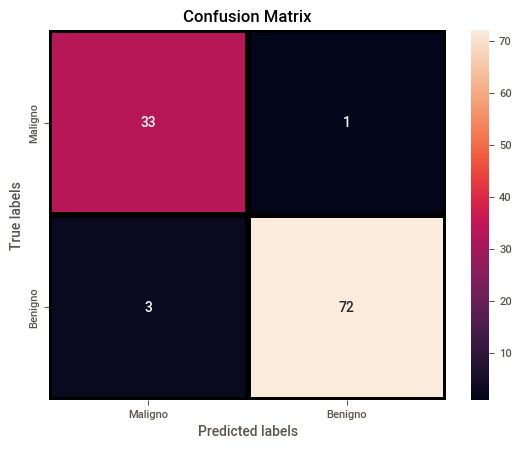

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, forecast_rl),
            annot=True,fmt = "d",linecolor="k",linewidths=3);

# configuração labels e titulos
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Maligno', 'Benigno']);
ax.yaxis.set_ticklabels(['Maligno', 'Benigno']);

In [ ]:
#KFold
from sklearn.model_selection import KFold, cross_val_score

validacao_cruzada_rl = KFold(n_splits=30, shuffle=True, random_state=1)
cross_val_score(pipeline,  breast_cancer_df[feature],  breast_cancer_df[target].values.ravel(), cv=validacao_cruzada_rl) #  A função ravel() é usada para transformar um array bidimensional em unidimensional.

array([0.89473684, 1.        , 0.94444444, 1.        , 1.        ,
       1.        , 1.        , 0.94444444, 1.        , 1.        ,
       0.88888889, 0.94444444, 0.94444444, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88888889, 1.        ,
       1.        , 0.94444444, 0.88888889, 1.        , 1.        ,
       1.        , 0.94444444, 1.        , 0.88888889, 0.88888889])

In [ ]:
acuracia_media_rl = cross_val_score(pipeline, breast_cancer_df[feature],  breast_cancer_df[target].values.ravel(), cv=validacao_cruzada_rl).mean()
print('Acurácia kfold: {}'.format(acuracia_media_rl))

Acurácia kfold: 0.9668615984405459


## Salvando o modelo

In [ ]:
import pickle

In [ ]:
with open('pipeline_rl.pkl', 'wb') as f:
  pickle.dump(pipeline, f)

## Fazendo previsões para novos dados

In [ ]:
# ativando o pipeline
with open('pipeline_rl.pkl', 'rb') as f:
  reloaded_model = pickle.load(f)

In [ ]:
reloaded_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
breast_cancer_valida.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


In [ ]:
# previsão
columns = breast_cancer_valida.columns
target = ['target']

feature = list(set(columns) - set(target))

breast_cancer_valida = breast_cancer_valida.reset_index()

predict_df = reloaded_model.predict(breast_cancer_valida[feature])

predict_df_pred = pd.DataFrame(predict_df, columns=['previsao'])
predict_df_pred.head()

,previsao
0,0
1,1
2,1
3,1
4,1


In [ ]:
# extraindo as probabilidades da previsão
predict_prb = reloaded_model.predict_proba(breast_cancer_valida[feature])

predict_df_prb = pd.DataFrame(predict_prb, columns=['prb_maligno', 'prb_benigno'])
predict_df_prb.head()

,prb_maligno,prb_benigno
0,0.851747,0.148253
1,0.126268,0.873732
2,0.042795,0.957205
3,0.086351,0.913649
4,0.023214,0.976786


In [ ]:
# acrescentando os dados de previsão na base de dados de validação
breast_cancer_prev = breast_cancer_valida.merge(predict_df_prb, how='inner', left_index=True, right_index=True)\
  .merge(predict_df_pred, how='inner', left_index=True, right_index=True)

breast_cancer_prev.head()

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,prb_maligno,prb_benigno,previsao
0,512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0,0.851747,0.148253,0
1,457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1,0.126268,0.873732,1
2,439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1,0.042795,0.957205,1
3,298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1,0.086351,0.913649,1
4,37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,0.023214,0.976786,1


# Machine Learning - Uma aplicação usando Pycaret
https://pycaret.org/


In [ ]:
!pip install pycaret

In [ ]:
# load dataset
from pycaret.datasets import get_data
# diabetes = get_data('diabetes')

display(breast_cancer_df.head())

# init setup

from pycaret.classification import *
clf1 = setup(data = breast_cancer_df, target = 'target')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


,Description,Value
0,Session id,8607
1,Target,target
2,Target type,Binary
3,Original data shape,"(541, 31)"
4,Transformed data shape,"(541, 31)"
5,Transformed train set shape,"(378, 31)"
6,Transformed test set shape,"(163, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9683,0.9914,0.9832,0.9689,0.9753,0.9311,0.9338,0.8610
et,Extra Trees Classifier,0.9631,0.9941,0.9790,0.9663,0.9716,0.9187,0.9224,0.1800
gbc,Gradient Boosting Classifier,0.9630,0.9929,0.9828,0.9603,0.9708,0.9202,0.9228,0.3650
rf,Random Forest Classifier,0.9605,0.9890,0.9707,0.9675,0.9688,0.9150,0.9160,0.2410
xgboost,Extreme Gradient Boosting,0.9605,0.9908,0.9748,0.9640,0.9687,0.9147,0.9172,0.1060
ridge,Ridge Classifier,0.9578,0.0000,0.9913,0.9476,0.9678,0.9062,0.9128,0.0310
ada,Ada Boost Classifier,0.9578,0.9887,0.9788,0.9580,0.9674,0.9073,0.9115,0.4120
lda,Linear Discriminant Analysis,0.9526,0.9938,0.9915,0.9399,0.9640,0.8943,0.9012,0.0320
qda,Quadratic Discriminant Analysis,0.9499,0.9881,0.9493,0.9716,0.9596,0.8933,0.8959,0.0360
nb,Naive Bayes,0.9446,0.9905,0.9703,0.9462,0.9571,0.8783,0.8823,0.0640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# create model
lr = create_model('xgboost')

# launch evaluate widget
# evaluate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9913,0.9565,0.9565,0.9565,0.8899,0.8899
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9211,0.9940,0.9167,0.9565,0.9362,0.8328,0.8341
3,0.9474,1.0000,0.9167,1.0000,0.9565,0.8902,0.8956
4,0.9737,0.9940,1.0000,0.9600,0.9796,0.9426,0.9442
5,0.9211,0.9524,0.9583,0.9200,0.9388,0.8278,0.8292
6,0.9211,0.9762,1.0000,0.8889,0.9412,0.8224,0.8357
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9730,1.0000,1.0000,0.9583,0.9787,0.9417,0.9433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Deep Learning - Redes Neurais Artificiais

## Setup

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape

(432, 30)

## Construção da rede e das funções de ativação

Já o **número de neurônios** em cada camada é uma questão mais empírica, não existindo regras explícitas para um cálculo ideal. ***Jeff Heaton, o autor de Introduction to Neural Networks for Java***, sugere três abordagens iniciais, que vamos aplicar como exemplo para uma rede contendo 30 neurônios na camada de entrada e 2 neurônios na camada de saída:

* O número de neurônios escondidos deve estar entre o tamanho da camada de entrada e o da camada de saída. Usar o número médio entre as duas camadas é uma boa opção; ou seja, no nosso exemplo, o valor de (30+2)/2 = 16 neurônios.
* O número de neurônios escondidos deve ser 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída. Assim, a camada escondida no nosso exemplo deve conter 30*2/3+2 = 22 neurônios.
* O número de neurônios escondidos deve ser menor que o dobro do tamanho da camada de entrada. Ou seja, no nosso exemplo, a camada escondida deve conter menos que 60 neurônios.

In [ ]:
# Definir quantidade de neurônios
# número de atributos pelo número de saídas
 (30 + 1) / 2

IndentationError: ignored

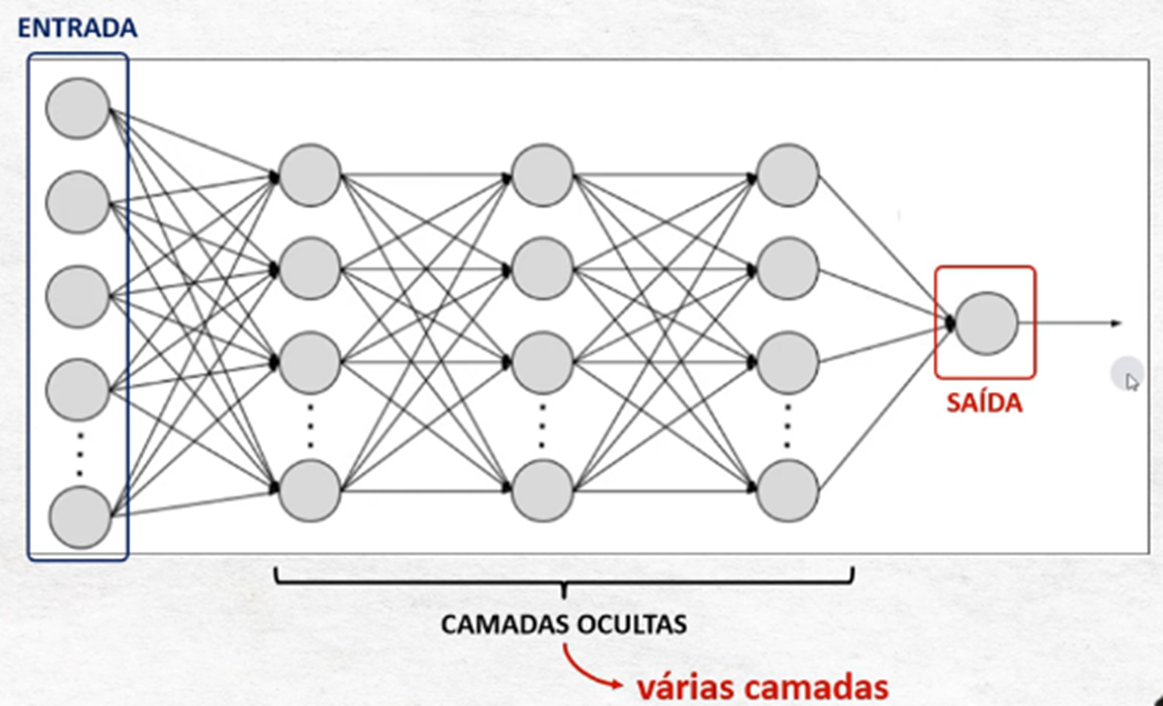

In [ ]:
# definir uma rede neural utilizando o tensorflow
rede_neural = tf.keras.models.Sequential()

# Camada de entrada: camada densa está ligado em todos os neuronios da proxima camada
rede_neural.add(tf.keras.layers.Dense(units = 15, activation='relu', input_shape=(30,)))

# função de ativação (se o valor for maior que zero, retorno o número, caso contrário, retorna zero)
rede_neural.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))

# Camada de saída. Grava valores entre 0 e 1
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# o objetivo da rede neural é encontrar o maior conjunto de pesos
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Treinamento da rede neural nos dados de treino

In [ ]:
# optimizer: ajuste dos pesos
# loss: para problemas de classificcação binária
# metrics: métrica para avaliação

rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# treinamento da rede neural para o ajuste dos pesos
#epochs: número de vezes que iremos realizar a atualização dos pesos.
rede_neural.fit(x_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 4ms/step - loss: 46.1210 - accuracy: 0.3912
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 27.7410 - accuracy: 0.3912
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 11.6383 - accuracy: 0.3912
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 1.5325 - accuracy: 0.6088
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8403
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.9028
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8981
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8889
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8935
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.9028
Epoch 

## Prevendo os valores com a rede neural treinada

In [ ]:
# prevendo os valores
y_pred = rede_neural.predict(x_test)
y_pred

4/4 [==============================] - 0s 5ms/step


array([[8.32668602e-01],
       [9.78630126e-01],
       [9.74214137e-01],
       [5.91066301e-01],
       [9.95181859e-01],
       [9.95992303e-01],
       [6.61286473e-01],
       [3.48366126e-02],
       [9.82850671e-01],
       [1.34778231e-14],
       [9.95947659e-01],
       [6.99272020e-12],
       [9.99022186e-01],
       [9.97890770e-01],
       [8.01465154e-01],
       [9.88480151e-01],
       [4.77445275e-01],
       [9.97831285e-01],
       [9.78035867e-01],
       [1.74067842e-04],
       [4.32189405e-02],
       [9.23914135e-01],
       [9.37556505e-01],
       [1.71293020e-01],
       [2.30647970e-06],
       [9.40965891e-01],
       [9.96678710e-01],
       [1.70705807e-05],
       [9.96772766e-01],
       [1.67145297e-01],
       [8.78317078e-05],
       [9.79547083e-01],
       [3.44794316e-05],
       [9.76544559e-01],
       [3.27177569e-02],
       [9.70480382e-01],
       [7.29364276e-01],
       [9.15381074e-01],
       [7.23970771e-01],
       [9.98021007e-01],


In [ ]:
# probabilidade em valores binários
y_pred = (y_pred >= 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

## Avaliação do modelo

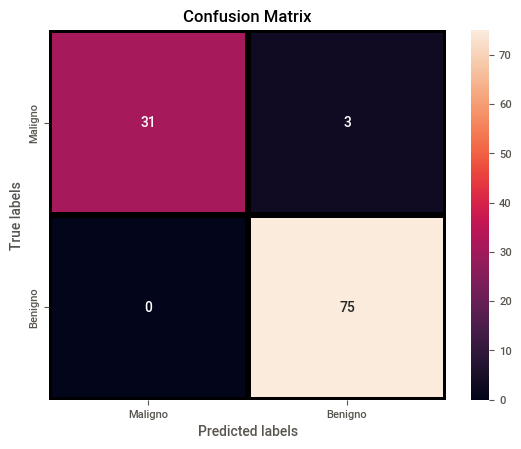

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3);

# configuração labels e titulos
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Maligno', 'Benigno']);
ax.yaxis.set_ticklabels(['Maligno', 'Benigno']);

In [ ]:
# relatório do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.96      1.00      0.98        75

    accuracy                           0.97       109
   macro avg       0.98      0.96      0.97       109
weighted avg       0.97      0.97      0.97       109



## Salvando o modelo

In [ ]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump(rede_neural, f)

## Fazendo previsões para novos dados

In [ ]:
with open('variaveis_modelo.pkl', 'rb') as f:
  model = pickle.load(f)

In [ ]:
model

In [ ]:
breast_cancer_valida.head()

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
1,457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
2,439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
3,298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
4,37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


In [ ]:
# previsão
columns = breast_cancer_valida.columns
target = ['target','index']


feature = list(set(columns) - set(target))

predict_df = model.predict(breast_cancer_valida[feature])

predict_df_pred = pd.DataFrame(predict_df, columns=['previsao'])
predict_df_pred.head()

1/1 [==============================] - 0s 125ms/step


,previsao
0,0.903359
1,0.830917
2,0.999929
3,0.999332
4,0.996923


In [ ]:
predict_df_pred['classificador'] = predict_df_pred['previsao'].apply(lambda x: 1 if x >= 0.5 else 0)
predict_df_pred.head()

,previsao,classificador
0,0.903359,1
1,0.830917,1
2,0.999929,1
3,0.999332,1
4,0.996923,1


In [ ]:
breast_cancer_pred = breast_cancer_valida[feature].reset_index()

In [ ]:
breast_cancer_pred.head()

,index,radius error,mean compactness,mean radius,mean area,mean concave points,mean smoothness,perimeter error,worst area,worst fractal dimension,...,mean symmetry,concave points error,worst compactness,worst symmetry,mean perimeter,worst texture,worst perimeter,compactness error,symmetry error,worst radius
0,0,0.3906,0.14690,13.40,556.7,0.08172,0.11060,3.093,844.4,0.11090,...,0.2116,0.013340,0.38560,0.3585,88.64,29.66,113.30,0.022650,0.01705,16.41
1,1,0.2084,0.05205,13.21,537.9,0.02068,0.08791,1.314,632.9,0.06788,...,0.1619,0.006451,0.10630,0.2444,84.10,34.23,91.29,0.008082,0.01347,14.35
2,2,0.2142,0.05581,14.02,606.5,0.02652,0.07966,1.606,688.9,0.06710,...,0.1589,0.010760,0.10170,0.2136,89.59,19.31,96.53,0.009238,0.01171,14.91
3,3,0.2300,0.05220,14.26,633.1,0.01374,0.06576,1.661,819.7,0.07676,...,0.1635,0.005243,0.21670,0.2636,91.22,25.26,105.80,0.013770,0.01103,16.22
4,4,0.1839,0.03766,13.03,523.8,0.02923,0.08983,1.170,545.9,0.06169,...,0.1467,0.011640,0.04619,0.1987,82.61,22.81,84.46,0.004899,0.02671,13.30


In [ ]:
# acrescentando os dados de previsão na base de dados de validação
breast_cancer_prev = pd.concat([breast_cancer_pred, predict_df_pred], axis=1)
breast_cancer_prev.head()

,index,radius error,mean compactness,mean radius,mean area,mean concave points,mean smoothness,perimeter error,worst area,worst fractal dimension,...,worst compactness,worst symmetry,mean perimeter,worst texture,worst perimeter,compactness error,symmetry error,worst radius,previsao,classificador
0,0,0.3906,0.14690,13.40,556.7,0.08172,0.11060,3.093,844.4,0.11090,...,0.38560,0.3585,88.64,29.66,113.30,0.022650,0.01705,16.41,0.903359,1
1,1,0.2084,0.05205,13.21,537.9,0.02068,0.08791,1.314,632.9,0.06788,...,0.10630,0.2444,84.10,34.23,91.29,0.008082,0.01347,14.35,0.830917,1
2,2,0.2142,0.05581,14.02,606.5,0.02652,0.07966,1.606,688.9,0.06710,...,0.10170,0.2136,89.59,19.31,96.53,0.009238,0.01171,14.91,0.999929,1
3,3,0.2300,0.05220,14.26,633.1,0.01374,0.06576,1.661,819.7,0.07676,...,0.21670,0.2636,91.22,25.26,105.80,0.013770,0.01103,16.22,0.999332,1
4,4,0.1839,0.03766,13.03,523.8,0.02923,0.08983,1.170,545.9,0.06169,...,0.04619,0.1987,82.61,22.81,84.46,0.004899,0.02671,13.30,0.996923,1
